## Part 1: Network
Goal: predict arm state as a function of neural state

In [1]:
from hw1 import *

In [2]:
# run 1 experiment with default args
execute_exp()

Params: Ntraining_2_rotation_0
File name base: ./results/bmi_ddtheta_hidden_10_5_Ntraining_2_rotation_0


c:\Users\ikang\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


41/41 [==============================] - 0s 3ms/step - loss: 22.3207 - fvaf: 0.3361 - root_mean_squared_error: 4.7245
INFO:tensorflow:Assets written to: ./results/bmi_ddtheta_hidden_10_5_Ntraining_2_rotation_0_model\assets


load results

In [1]:
import os
import fnmatch
import pickle
import matplotlib.pyplot as plt

def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''
    
    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []
    
    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    return results

#filebase = "bmi_torque_0_hidden_30_drop_0.50_ntrain_%02d_rot_*_results.pkl"
filebase = "bmi_ddtheta_hidden_10_5_Ntraining_2_rotation_0_results.pkl"
results = read_all_rotations("results", filebase)

In [2]:
# what args did we use?
results[0]['args']

Namespace(dataset='bmi_dataset2.pkl', output_type='ddtheta', predict_dim=None, Nfolds=20, activation_out=None, activation_hidden='elu', hidden=[10, 5], rotation=0, epochs=100, Ntraining=2, exp_type='bmi', exp_index=None, lrate=0.001, dropout=None, L1_regularization=None, L2_regularization=None, min_delta=0.0, patience=100, gpu=False, cpus_per_task=None, results_path='./results', verbose=0, nogo=False, check=False)

### FIGURE 1

In [ ]:
plt.figure(figsize=(200, 6))
plt.plot(results[0]['time_testing'], results[0]['outs_testing'][:,1], label='actual')
plt.plot(results[0]['time_testing'], results[0]['predict_testing'][:,1], label='predict')
plt.ylabel('acceleration (ddtheta)')
plt.xlabel('time')
plt.legend()

## Part 2: Multiple Runs
Loads all of the stored results (rotations x training set sizes)\
Computes average training/validation/testing FVAF for each training fold size (average across the rotations)\
FIGURE 2: Generates a plot with three curves (one for each data set type): FVAF as a function of training set size

In [1]:
import os
import fnmatch
import pickle
import numpy as np
import matplotlib.pyplot as plt

def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''
    
    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []
    
    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    return results

filebase = "bmi_ddtheta_hidden_10_5_JI_Ntraining_*_rotation_*_results.pkl"
results = read_all_rotations("results", filebase)

In [2]:
print(len(results)) # should be 20*8 = 160 eventually
results[159].keys()

160


dict_keys(['args', 'predict_training', 'predict_training_eval', 'outs_training', 'time_training', 'predict_validation', 'predict_validation_eval', 'outs_validation', 'time_validation', 'predict_testing', 'predict_testing_eval', 'outs_testing', 'time_testing', 'folds', 'history', 'fname_base'])

In [3]:
results_array = np.ones([20,18,3]) # (rotations x training set sizes)
for i in range(160):
    r = results[i]['folds']['folds_training'][0]
    tss = results[i]['folds']['folds_training'].size - 1
    results_array[r,tss,0] = np.sum(results[i]['predict_training_eval'][1])/2
    results_array[r,tss,1] = np.sum(results[i]['predict_validation_eval'][1])/2
    results_array[r,tss,2] = np.sum(results[i]['predict_testing_eval'][1])/2
results_array = np.delete(results_array, [5,6,7,9,10,11,13,14,15,16], axis=1) # delete unused columns

In [4]:
tss_plot_x = [1,2,3,4,5,9,13,18] # list of folds (for plotting)
results_plot_y = np.sum(results_array,0)/20 # FVAF average across rotations
print(results_plot_y)

[[0.97791983 0.35463637 0.35415682]
 [0.96244336 0.36097929 0.3631497 ]
 [0.95303562 0.35007606 0.338788  ]
 [0.9381205  0.37001271 0.36229508]
 [0.92621214 0.39168655 0.40530238]
 [0.88719971 0.4672586  0.47917562]
 [0.86031299 0.56035737 0.56181702]
 [0.83779795 0.60517882 0.59389457]]


### FIGURE 2

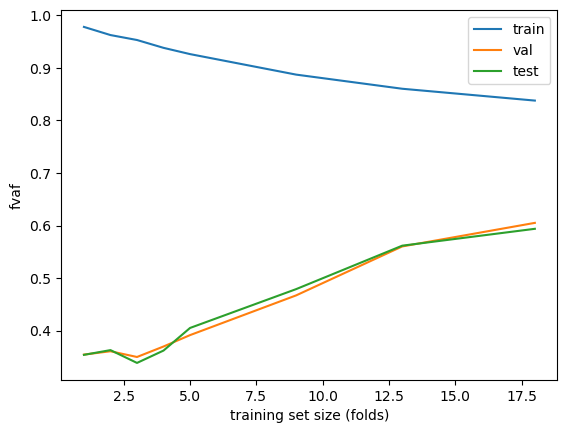

In [5]:
plt.figure()
plt.plot(tss_plot_x, results_plot_y[:,0], label='train')
plt.plot(tss_plot_x, results_plot_y[:,1], label='val')
plt.plot(tss_plot_x, results_plot_y[:,2], label='test')
plt.ylabel('fvaf')
plt.xlabel('training set size (folds)')
plt.legend()